![](IMT.jpg)

---
# Evaluation
---

Riahi LOURIZ

    Ingénieur généraliste, Data science 
    
    Promo 2018
    
    e-mail perso :riahilouriz@gmail.com
    
    e-mail école :riahi.louriz@telecom-bretagne.eu
    

Preparing, preprocessing, understanding data, feature engineering and modeling are considered a very important steps in machine learning. 
However, a Data scientist should be very aware about the results of his model and the way how to interpret his results.
This lab covers evaluation and model selection methods that you can use to help understand and optimize the performance of your machine
learning models.

## Objectives:

1. Understand why accuracy alone can be an inadequate metric for getting a more complete picture of a classifier's performance

2. Understand the motivation and definition of a variety of important evaluation metrics in machine learning and how to interpret the results of using a given evaluation metric

3. Optimize a machine learning algorithm using a specific evaluation metric appropriate for a given task

#### key words :

Accuracy, Recall, Precision, F-score, AUC, ROC curve, Confusion Matrices, Grid Search.

###### We are going to work on breast_cancer and  digits datasets which exist already in sklearn.
    The first part we are going to use the breast_cancer dataset, and the second part will be about the digits dataset

For more information about the dataset, you can visit the following link :
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# Part 1 :

## Required libraries: 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

## Loading dataset:

In [2]:
cancer = load_breast_cancer()

### feature names :

In [3]:
print('cancer data contains',len(cancer.feature_names), 'features, which are :')
print(cancer.feature_names) 

cancer data contains 30 features, which are :
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<mark>Our data set contains 30 numerical attributes(features).</mark>

### target names :

In [4]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

<mark> The target column has 2 different values : malignant and benign </mark>

In [5]:
#X_cancer : features values in a numpy array form
#y_cancer : target values in a numpy array form
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

###### from now, we are going to work on X_cancer and y_cancer arrays.

### Description of the target :

In [6]:
#length of y_caner
print('Length of y_cancer :',len(y_cancer))
# percentage of malignant. Note that malignant is encoded as '0'
print( 'Percentage of malignant:',(1-np.mean(y_cancer))*100,'%')

Length of y_cancer : 569
Percentage of malignant: 37.2583479789 %


<mark> Comment : Notice that the class '0' is the minority class. This fact will help us understand the evaluation methods very well.

## Dummy classifiers :

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against future classifiers, especially when the data presents imbalanced classes( like our case with the breast cancer dataset).

### Some notes about a dummy classifier : 

- We can use it as a sanity check for the models that we have developed.
- We should not use those classifiers in real application
- They provide a null metric baseline.
- Can be used for classification and regression
- Some strategies, for classification task, used for strategy parameter : 
    - most_frequent : predicts the most frequent label in the dataset
    - stratified : random prediction based on the target distribution
    - uniform : predictions are generated uniformly at random
    - constante:  predicts a constant provided by the user.

In [7]:
#split our data for train/test
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

### Build a Dummy classifier :

#### most_frequent startegy:

In [8]:
from sklearn.dummy import DummyClassifier

# Negative class (1) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 1
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [9]:
# score :
dummy_majority.score(X_test, y_test)

0.62937062937062938

Notice that the result is equal to the proportion of the negative class '1'

#### stratified strategy:

In [10]:
dummy_stratified = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 1
y_dummy_predictions = dummy_stratified.predict(X_test)
y_dummy_predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1])

In [11]:
dummy_stratified.score(X_test,y_test)

0.5174825174825175

### Confusion matrices :

![](confusion_matrix.png)
 

In our case the positive class is '0' and the negative class is '1'

In [12]:
from sklearn.metrics import confusion_matrix

# Negative class (1) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[ 0 53]
 [ 0 90]]


In [13]:
# produces random predictions same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[20 33]
 [36 54]]


Untill now we have got a full idea about how a dummy classifier works, and how to exploit it as baseline for comparaison with a model
which must outperfoms the performance of this dummy classifier.

<b>Let's now exploit a diversity of classifiers and compare their confusion_matrix:</b> 

## SVM classifier

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
prediction=svm.predict(X_test) #predict on X_test, then show them ( next line of code)
print('the score on the test set is :',svm.score(X_test, y_test),'\nBut look at the confusion matrix :')
confusion = confusion_matrix(y_test, prediction)

print('Support vector machine classifier (rbf kernel, C=1)\n', confusion)


the score on the test set is : 0.629370629371 
But look at the confusion matrix :
Support vector machine classifier (rbf kernel, C=1)
 [[ 0 53]
 [ 0 90]]


When we see  an accuracy of 62.93% maybe we can guess that our model is doing right ( not very good) but it is slightly good. Nevertheless, by looking at the confusion matrix we can figure out that our model is very poor in predicting the positive class '0'.

==> That's why we need other metrics measurements to assess the model's performance.

Before exploring those new metrics let's explore more classifiers and print their confusion matrices :

### SVC with a linear kernel

In [15]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[52  1]
 [ 5 85]]


## Logistic regression 

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[52  1]
 [ 5 85]]


## Decision tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[48  5]
 [ 4 86]]


<mark>SVM with a linear kernel and the logistic regression perform the same and more efficiently than decision tree.</mark>

## Evaluation metrics for binary classification

### Recall about: Recall, Precision, F-score 

#### Recall :

- Recall or True Positive Rate (TPR) is the fraction of all positive instances that the model predicts correctly as positive.
- Recall is called also : Sensitivity or Probability of detection


Formula : 
    Recall = TP/(TP+FN)

In [18]:
#Example : using the output of our decision tree( max_depth=2) 
Recall= 48/(48+5) 
Recall

0.9056603773584906

#### Precision 

- Precision: what fraction of positive predictions are correct.

    

Formula : Precision = TP/(TP+FP)

In [19]:
#Example : using the output of our decision tree( max_depth=2) 
Precision= 48/(48+4)
Precision

0.9230769230769231

#### The Precision-Recall Tradeoff

In real applicatio there is always a tradeoff between the recall and precision values.To illustarte this tradeoff, i will use the following examples which I have found in Applied Machine Learning in Python ( Coursera) online course.

![](eval1.JPG)



![](eval2.JPG)

The example above show a classifer  which performs very well on the positive class ( do not worry about the form of the matrix, you should just knwo what is your positive and negative class). 
By looking at the decision boundary, it is very clear that the classifier does not provide any False Alarm( FP=0). To grasp it, for our breast cancer data the false alarm raises  when we declare an instance as malignant but in reality it is benign.

![](eval3.JPG)

The classifier above handles very well the negative class( FN=0). For breast cancer, a FN different from  0  raises when the classifier classifies some instances as bening but they are malginant.
==> This is the most important thing in a model used in a such field (medical field). This is due to the fact that if we declare to a person that he (she) is clean from any cancer but in reality he (she) is, we are committing a big error.
<mark>In short words, th best classifier for this case is the one whose Recall is near to 1.</mark>

#### F-score :

- It combines Recall and Precision.
-  Formula : F-score = 2 * Recall * Precision/(Recall+Precision)= 2 TP/(2TP+ FN + FP)

#### F-Beta:


- F-score with a beta paramter that can be adjusted
-  Formula : F-Beta =(1+Beta^2)TP / ((1+Beta^2)TP + Beta FN + FP)
- Beta small ===> Precision oriented
- Beta high ===> Recall oriented 

Let's apply all the metrics using the tree_predicted array from the decision tree classifier: 

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F-score = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted,pos_label=0))) # our postive label is '0'
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted,pos_label=0)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted,pos_label=0)))

Accuracy: 0.94
Precision: 0.92
Recall: 0.91
F1: 0.91


###### Classification report ouput for all the previous classifiers 


It allows you to print a full summary about the performance of your classifier towards all your labels in the target column

In [21]:
from sklearn.metrics import classification_report
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['Malignant', 'Benign']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['Malignant', 'Benign']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['Malignant', 'Benign']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['Malignant', 'Benign']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

  Malignant       0.36      0.38      0.37        53
     Benign       0.62      0.60      0.61        90

avg / total       0.52      0.52      0.52       143

SVM
              precision    recall  f1-score   support

  Malignant       0.91      0.98      0.95        53
     Benign       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143

Logistic regression
              precision    recall  f1-score   support

  Malignant       0.91      0.98      0.95        53
     Benign       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143

Decision tree
              precision    recall  f1-score   support

  Malignant       0.92      0.91      0.91        53
     Benign       0.95      0.96      0.95        90

avg / total       0.94      0.94      0.94       143



<mark><b> The  best model is the one which maximizes the Recall.</b></mark>

## Grid Search :
     - Grid search is used to find the best parameters of a chosen model that maximizes a scoring metric.

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score

svc = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
#metric to optimize over grid parameters: Recall
grid_clf_recall = GridSearchCV(svc, param_grid = grid_values, scoring = 'recall')
grid_clf_recall.fit(X_train, y_train)
y_decision_fn_scores_recall = grid_clf_recall.predict(X_test) 

print('Test set Recall: ', recall_score(y_test, y_decision_fn_scores_recall))
print('Grid best parameter (max. Recall): ', grid_clf_recall.best_params_)
print('Grid best score (Recall): ', grid_clf_recall.best_score_)

Test set Recall:  1.0
Grid best parameter (max. Recall):  {'gamma': 0.01}
Grid best score (Recall):  1.0


Conclusion : 
    - Grid search above shows that the best gamma for our SVC classifier is 0.01, which gives as best score for recall 1.

---
Untill now, we have a got a full idea about the need for other metrics to assess the performance of a classifier. We have shown that accuracy is not a  good metric when your data presents imbalanced class.

---

# Part 2

In this part we are going to explore the digits dataset to highlight the same concepts mentionned in the first part but with more algorithms like Neural Network and Gradient Boosting.




### Loading Data :

In [23]:
from sklearn.datasets import load_digits

### Data description 

In [24]:
dataset = load_digits() #"Optical Recognition of Handwritten Digits Data Set
X, y = dataset.data, dataset.target
dataset.DESCR # read data description

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [25]:
# we have :
#          5620 instances 
#          64 attributes ( integer pixels in the range 0:16) 
#          target names : are numbers from 0 to 9

In [26]:
# let's count the support for each target name :
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)


0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


As you can see this is a multiclassification problem. We are not going to deal with that kind of problems  in this lab, that's why we will make this problem as a binary classification by choosing one label as a positive class ( we choose '1') and other digits are the negative class.

### Creating imbalanced dataset :

In [27]:
y_binary_imbalanced = y.copy() #  make a copy of y
y_binary_imbalanced[y_binary_imbalanced != 1] = 0  # all digits # from 1 we replace them by 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [28]:
# the proportion of the postive class :
np.mean(y_binary_imbalanced)

0.10127991096271564

This  is a more challenging problem, because the positive class represents only 10% of the target labels.

### Dummy classifier :

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
# spli data :
X_train, X_test, y_train, y_test= train_test_split(X, y_binary_imbalanced,random_state=0)
# verify that the distribution of our class is the same in both training/ testing datsets :
print('proportion of 1 in training is :', np.mean(y_train))
print('proportion of 1 in testing is :', np.mean(y_test))

# build model :
dummy=DummyClassifier(strategy='most_frequent')
dummy=dummy.fit(X_train, y_train)

print('testing score :',dummy.score(X_test, y_test))


proportion of 1 in training is : 0.103192279139
proportion of 1 in testing is : 0.0955555555556
testing score : 0.904444444444


90% as accuracy is very good, But we must not trust this result as we are facing imbalanced dataset.

let's see the confusion matrix for our dummy classifier :

In [30]:
from sklearn.metrics import confusion_matrix
y_most_frequent=dummy.predict(X_test)

confusion_most_frequent=confusion_matrix(y_test, y_most_frequent) # it outputs result in sorted order ( ie: 0 then 1 )

print(confusion_most_frequent)

[[407   0]
 [ 43   0]]


As you can see our dummy classifier does not predict correctly any '1' example.

### SVC classifier

In [31]:
from sklearn.svm import  SVC
svc=SVC(kernel='rbf', C=1)
svc=svc.fit(X_train,y_train)
y_svc=svc.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_svc)

print('testing score svc (kernel= rbf and C= 1)',svc.score(X_test,y_test))
print(confusion_svc)



testing score svc (kernel= rbf and C= 1) 0.908888888889
[[407   0]
 [ 41   2]]


It is very obvious that our SVC classier does not do  well even more that as our previous dummy classifier.

Before continuing our lab, I would like to highlight some remarks :
    - Always try to begin with a baseline accuracy using the dummy classifier
    - Your model that you should get must outperfom the dummy classifier
    - Your model must maximize the scoring metrics that is very appropriate to your context (eg: Recall for health field, Precision for engine searching)

### SVC classifier( linear kernel) : 

In [32]:
svm = SVC(kernel='linear', C=10).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print('Training score using SVC ( linear kernel and C=10) is :', svm.score(X_train,y_train))
print('Testing score using SVC ( linear kernel and  C=10 ) is :', svm.score(X_test,y_test))
print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Training score using SVC ( linear kernel and C=10) is : 1.0
Testing score using SVC ( linear kernel and  C=10 ) is : 0.977777777778
Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


Good results, but it seems that by comparing training and testing accuracies we have overfitting.

### Logistic regression :

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Training score using logistic reg is :', lr.score(X_train,y_train))
print('Testing score using logistic reg  is :', lr.score(X_test,y_test))
print('Logistic regression classifier (default settings)\n', confusion)

Training score using logistic reg is : 0.993318485523
Testing score using logistic reg  is : 0.973333333333
Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Training score using decision tree is :', dt.score(X_train,y_train))
print('Testing score using  decision tree is :', dt.score(X_test,y_test))
print('Decision tree classifier (max_depth = 2)\n', confusion)

Training score using decision tree is : 0.936896807721
Testing score using  decision tree is : 0.946666666667
Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


#### Classification report for all the previous classifiers :

In [35]:
from sklearn.metrics import classification_report
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_most_frequent, target_names=['not digit  1', 'digit 1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not digit 1', 'digit 1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['notdigit  1', 'digit 1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['notdigit  1', 'digit 1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

not digit  1       0.90      1.00      0.95       407
     digit 1       0.00      0.00      0.00        43

 avg / total       0.82      0.90      0.86       450

SVM
              precision    recall  f1-score   support

not digit 1       0.99      0.99      0.99       407
    digit 1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

notdigit  1       0.99      0.99      0.99       407
    digit 1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

notdigit  1       0.96      0.98      0.97       407
    digit 1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can figure out, results are different from a model to another, especially for the postive class

Now, we will use another metric, which is also used in the case of imbalanced class :

### ROC curves, Area-Under-Curve (AUC)

#### SVM :

<IPython.core.display.Javascript object>


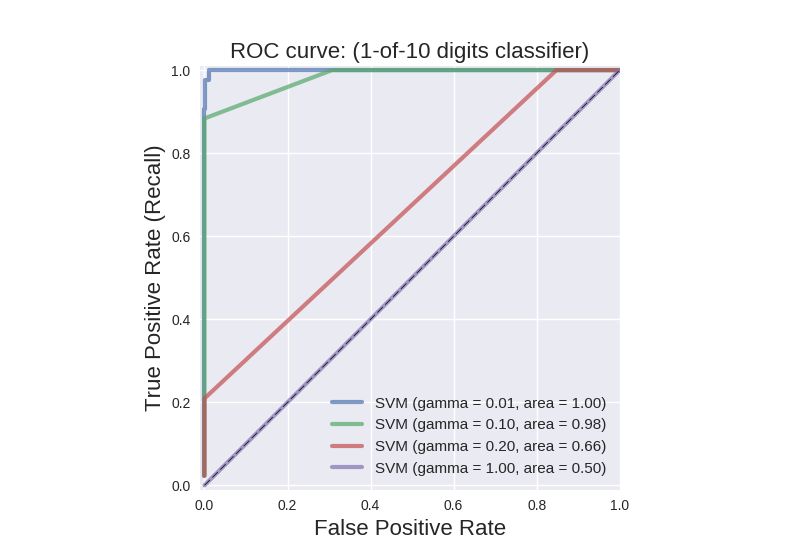

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [36]:
from sklearn.metrics import roc_curve, auc
from matplotlib import cm


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--') # plot the line corresponding to AUC=0.5
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

<mark>The best gamma is the which provides the best AUC score, in this case gamme=0.01</mark>

#### Decision Tree:

<IPython.core.display.Javascript object>


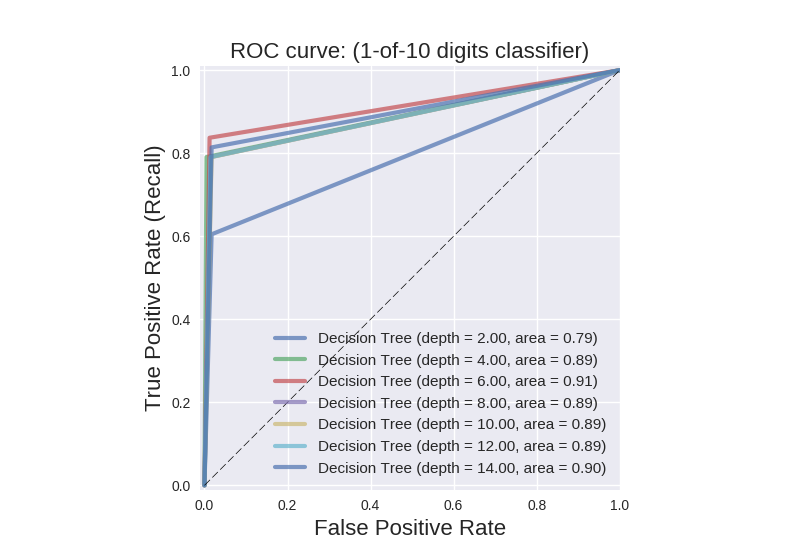

max_depth = 2.00  accuracy = 0.95   AUC = 0.79
max_depth = 4.00  accuracy = 0.98   AUC = 0.89
max_depth = 6.00  accuracy = 0.97   AUC = 0.91
max_depth = 8.00  accuracy = 0.97   AUC = 0.89
max_depth = 10.00  accuracy = 0.96   AUC = 0.89
max_depth = 12.00  accuracy = 0.97   AUC = 0.89
max_depth = 14.00  accuracy = 0.97   AUC = 0.90


In [37]:
from matplotlib import cm


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for depth in [2, 4, 6, 8,10,12,14]:
    dt = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_score_dt = dt.predict(X_test)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    accuracy_dt = dt.score(X_test, y_test)
    print("max_depth = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(depth, accuracy_dt, 
                                                                    roc_auc_dt))
    plt.plot(fpr_dt, tpr_dt, lw=3, alpha=0.7, 
             label='Decision Tree (depth = {:0.2f}, area = {:0.2f})'.format(depth, roc_auc_dt))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--') # plot the line corresponding to AUC=0.5
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

Comments :
    - As the max_depth increases, we got overfitting
    - The best max_depth values is: 8

### Random Forests :

##### Notes about Random Forests :

    - Random Forests( RF) is widely used in this field of machine learning and provides good results in many problems.
    - RF is composed of many trees ( like decision tree but we have many trees)
    - RF can be used either for classification or regression.
    - The fact of having many trees helps us avoid overfitting, because we got a good generaliztion for the dataset.

##### Random Forest process :

The figure below illustrates very well the process of RF :
    - So it is clear that after splitting the datasets into multiple subsets ( len(subset) <= len(original dataset) ), each tree will be learned using a subset.
    - How the subsets are  generated: Given an original dataset D of size n ( number of instances), m ( number of trees) subsets are genereated, each of size n' ( n'<=n), by sampling from D uniformly with/without replacement. When we sample by replacement, some instances my be occured several times within the same subset. This method is called: Bagging.
    - Then m models are fitted usin the m subsets generated before.

![](RF2.JPG)

##### Random Forest max_features Parameter :

- learning is quit sensitive to max_feature paramater ( for more info about this parameter look at the documentation in sklearn)
- if you set max_features=1 ==> you will get complex trees
- if your set max_features= or close to the number of features ==> you will get similar trees

##### Prediction using Random Forests:
    Suppose having you have already fitted your model and want to predict for an unseen instance :
        - Use every tree to predict the label for your new instance
        - Combine all your results, by :
            - Taking the mean if your model is about regression
            - Taking the most appeared label ( majority vote) if your model is about classification  

##### Adv & Des : 

<b>Adv :</b>
    - Very good result in many problems
    - Does nor require a lot of preprocessing and preparation
    - Can handle like decision tree a mixture of attribute types
    - Can be parallelized across multiple CPUs
<b>Des :</b>
    - Extreme values often poorly estimated in case of regression
    - Learning can take time if you do not have enough cores.

In [38]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_features = 8, random_state = 0) 
RF.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.98


#### Confusion matrix :

In [39]:
y_RF=RF.predict(X_test)
confusion_RF=confusion_matrix(y_test,y_RF)
print(confusion_RF)
print( classification_report(y_test,y_RF))

[[407   0]
 [  7  36]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       407
          1       1.00      0.84      0.91        43

avg / total       0.98      0.98      0.98       450



<mark>RF provides a Precision of 1 for the minority class</mark>

### Gradient-boosted decision trees

##### Notes about Gradient-boosted decision trees:

- During training a series of small decision trees are built
- Each new model is influenced by the performance of those built previously.
- Encourages new models to become experts for instances handled incorrectly by earlier ones by assigning greater weight to those instances.
- Learning  rate : is about how hard the new tree will attempt to correct remaining errors from the previous trees.
- Learning rate parameter : should be tunned very well as a high values can lead to more complex trees and small values lead to simpler trees.

#### Adv & Des :
    

<b>Adv :</b>
    - Often best accuracy on many problems
    - Does not require normalization to perform well
    - Handles mixture of feature types
<b> Des :</b>
    - Models built are often hard to  human to interpret 
    - Not recommended for text classification and problems with high dimensional sparse features(ie features with a lot of zeros)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier


GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(X_train, y_train)

print('Digits  dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(GBC.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(GBC.score(X_test, y_test)))

GBC = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
GBC.fit(X_train, y_train)

print('Digits  dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(GBC.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(GBC.score(X_test, y_test)))

Digits  dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.99

Digits  dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.93
Accuracy of GBDT classifier on test set: 0.93


#### Confusion matrix

In [41]:
y_GBC=GBC.predict(X_test)
confusion_GBC=confusion_matrix(y_test,y_GBC)
print(confusion_GBC)
print(classification_report(y_test,y_GBC))

[[406   1]
 [ 30  13]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       407
          1       0.93      0.30      0.46        43

avg / total       0.93      0.93      0.91       450



<mark>Gradiet Boosting provides a small value for the recall of the postive class</mark>

### Neural networks :

##### Notes about Neural networks:

Example : The example below contains two hiden layers , each of 4 units.

![](NN.jpeg)

#### Activation functions

Below we have some activation functions which are used for computing coefficient in each unit.

<IPython.core.display.Javascript object>


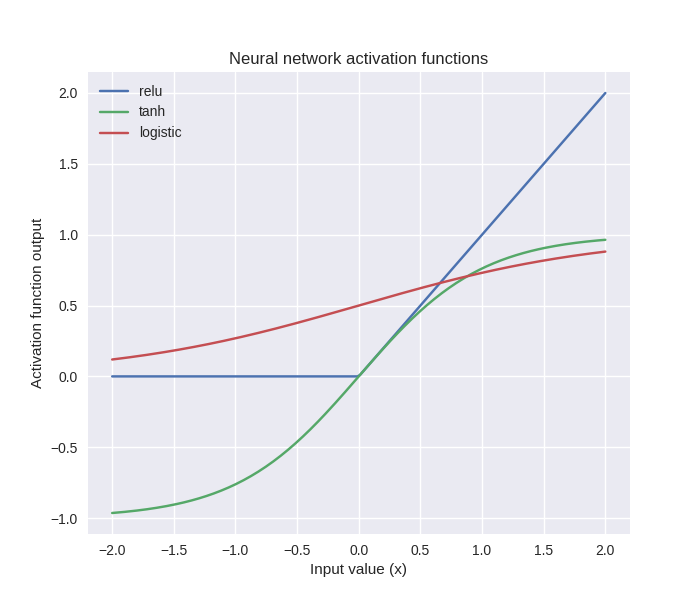

In [42]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLP = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)
# hidden_layer_sizes =[100,100]==> means  we will use 2 hidden layers, each of them with 100 units
# Note that MLP has many paramater to tune. Here we limit for one parameter for illustrating
print('Digits  dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(MLP.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(MLP.score(X_test_scaled, y_test)))

Digits  dataset
Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 0.99


In [44]:
y_MLP=MLP.predict(X_test)
confusion_MLP=confusion_matrix(y_test,y_MLP)
print(confusion_MLP)
print(classification_report(y_test,y_MLP))

[[ 95 312]
 [  0  43]]
             precision    recall  f1-score   support

          0       1.00      0.23      0.38       407
          1       0.12      1.00      0.22        43

avg / total       0.92      0.31      0.36       450



#### The effect of activation function : 

In [45]:
activation_functions=['relu','tanh','logistic']
for activation_function in activation_functions :
    MLP = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0, activation=activation_function,random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

    print('Digits  dataset')
    print('For',activation_function,': Accuracy of NN classifier on training set: {:.2f}'
         .format(MLP.score(X_train_scaled, y_train)))
    print('For',activation_function,'Accuracy of NN classifier on test set: {:.2f}'
         .format(MLP.score(X_test_scaled, y_test)))

Digits  dataset
For relu : Accuracy of NN classifier on training set: 1.00
For relu Accuracy of NN classifier on test set: 0.99
Digits  dataset
For tanh : Accuracy of NN classifier on training set: 1.00
For tanh Accuracy of NN classifier on test set: 0.99
Digits  dataset
For logistic : Accuracy of NN classifier on training set: 0.98
For logistic Accuracy of NN classifier on test set: 0.99


- You can print the classification report for each model to see more diffrences

- Logistic regression is a good generalization for the dataset.

<mark>MLP provides a recall equal to 1 for the positive class but with  a very poor precision. </mark>

#### Conclusion :
    

Running different models gives differents results in term of Recall, Precision and Accuracy. The final decision depends on our needs. If we are looking for a model that minimizes False Negative( maximizes Recall), MLP is the best choice. Otherwise  if we are lookin for a model that minimizes the False Positive (maximizes Precision) then RF is the best one.

# Bibliography 
    
    

1. https://www.coursera.org/learn/python-machine-learning
2. Arbres de Décision et Forêts Aléatoires Pr. Fabien Moutarde Centre de Robotique (CAOR) MINES ParisTech (ENSMP) PSL Research University
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.google.fr/search?q=confusion+matrix&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiY-L_atP3WAhVGNhoKHYFfCFoQ_AUICigB&biw=1366&bih=662#imgrc=qaM5X9E7c28zqM:
5. Ensemble Models Dr. ChooYunHuoy Department of Industrial Computing Faculty of Information and Communication Technology, UTeM Melaka, Malaysia
6. https://goo.gl/images/A3udxy